# Loan Status Classification

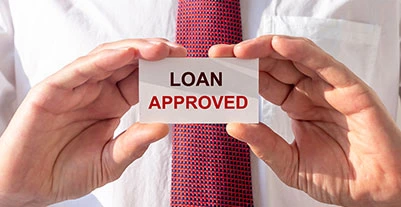

- Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.

- **Business Problem :-**
The bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.


- **Business Objective :-**
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application.


- **Machine learning can be used to predict the creditworthiness of home loan applicants with a high degree of accuracy.
- The use of machine learning to assess creditworthiness will reduce the time it takes to process applications and improve the overall efficiency of the loan application process.
- Providing an immediate response to applicants will increase customer satisfaction and improve the bank's reputation.

## Importing some important librarys

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm,skew

## Reading dataframe

In [2]:
df= pd.read_csv('train_ctrUa4K.csv')
df.head()

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis

### Target Column >> Loan_Status

### Problem Statement:- We have to find out the person is Eligble for loan or not based on feature

In [5]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

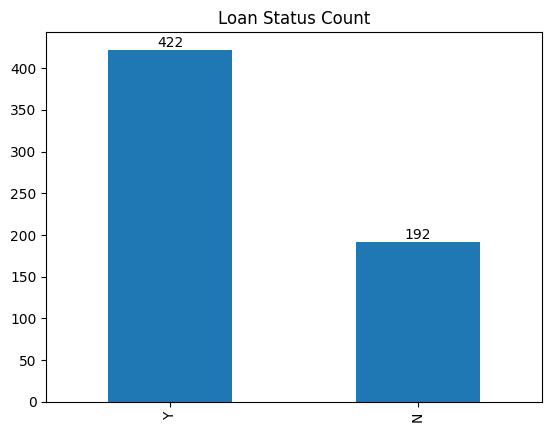

In [6]:
ax=df['Loan_Status'].value_counts().plot(kind="bar")
plt.title("Loan Status Count")
for container in ax.containers:
    ax.bar_label(container)

 - Imbalance Target Column

# Categorical feature

##  Gender

In [7]:
#function is created to explore Feature of datatype=Object

def feature_info(feature):
    print(df[feature].value_counts())
    print('\n')
    print(df.groupby(feature)['Loan_Status'].value_counts(normalize=True))
    
    ax=sns.countplot(data=df,x=feature,hue='Loan_Status')
    plt.title(f"{feature}(count) VS Loan_Status")
    for container in ax.containers:
        ax.bar_label(container)
        
    return feature
    
    

Male      489
Female    112
Name: Gender, dtype: int64


Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64


'Gender'

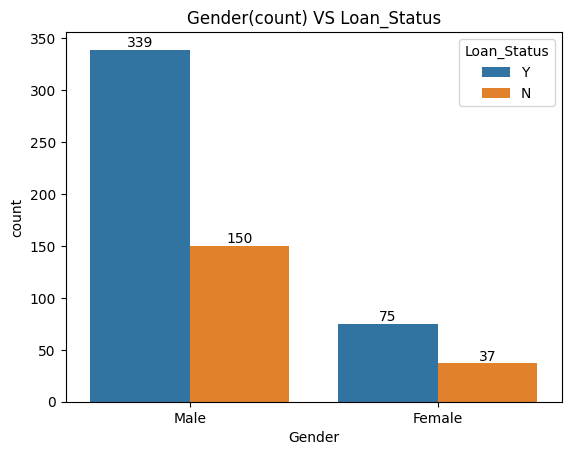

In [8]:
feature_info("Gender")

#####  From above it shows that the Male count is higher than Female 
#### Gender Male and female have almost the same possibility of getting a loan.

# Married

#### Person married or not
- Yes- Married
- No-  Not Married

Yes    398
No     213
Name: Married, dtype: int64


Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: Loan_Status, dtype: float64


'Married'

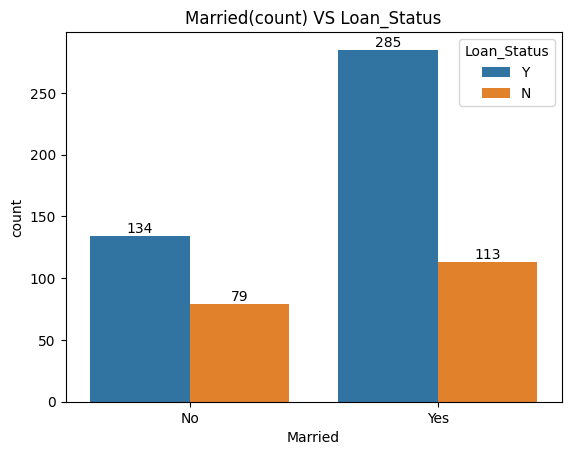

In [9]:
feature_info('Married')

##### most people who get married did get a loan ,if you'r married then you have better chance to get a loan 

## Dependents

### dependent feature tells about how many persons are dependant on the person who applied for loan
For example, if the person has a spouse and children, then the dependent person's count is two.


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Dependents  Loan_Status
0           Y              0.689855
            N              0.310145
1           Y              0.647059
            N              0.352941
2           Y              0.752475
            N              0.247525
3+          Y              0.647059
            N              0.352941
Name: Loan_Status, dtype: float64


'Dependents'

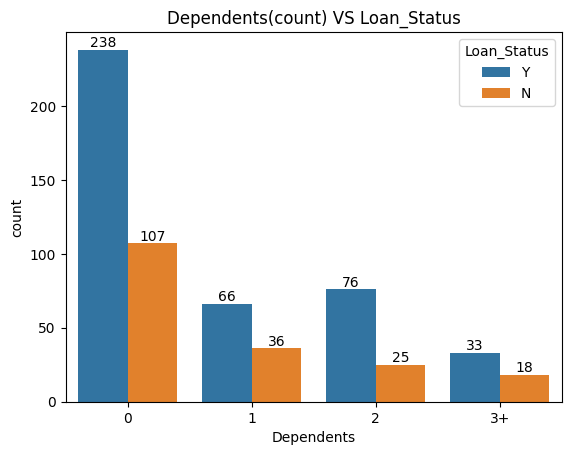

In [10]:
feature_info('Dependents')

In [11]:
df.groupby('Loan_Status')['Dependents'].value_counts()

Loan_Status  Dependents
N            0             107
             1              36
             2              25
             3+             18
Y            0             238
             2              76
             1              66
             3+             33
Name: Dependents, dtype: int64

##### if Dependents = 0 , we got higher chance to get a loan ((very hight chance))

## Education

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: Loan_Status, dtype: float64


'Education'

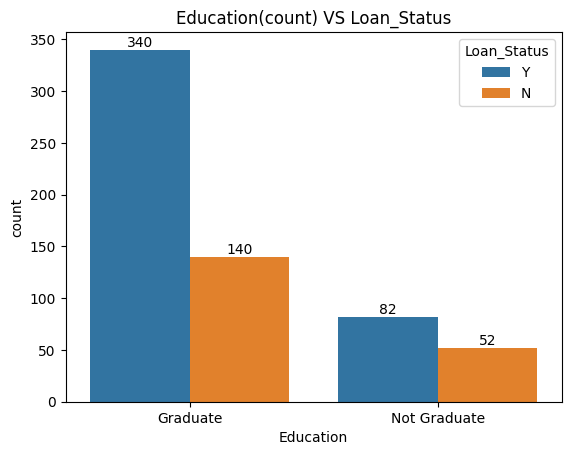

In [12]:
feature_info('Education')

##### Count of graduated persons are more than the not graduated for the person who applied for the loan
#### possibility of gettling loan graduated persons are more than the not graduated.

## Self_Employed

- Yes- Self_Employed
- No- Not self_Employed

No     500
Yes     82
Name: Self_Employed, dtype: int64


Self_Employed  Loan_Status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: Loan_Status, dtype: float64


'Self_Employed'

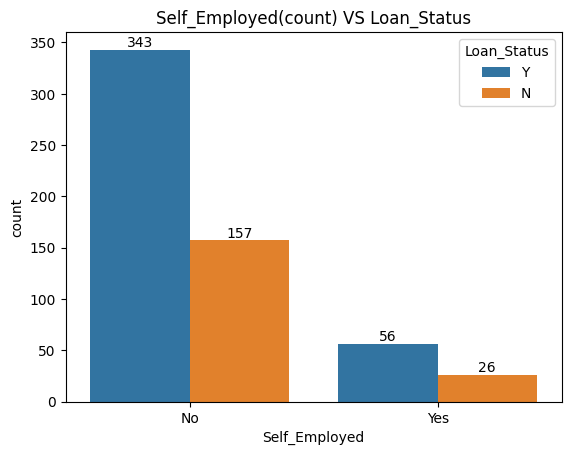

In [13]:
feature_info('Self_Employed')

##### People who are not self-employed are more likely to apply for a loan. 
##### Whether you are self-employed or not, you have an equal chance of getting a loan or not.(no pattern)

# Property_Area

- Urban
- Semiurban
- Rural

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Property_Area  Loan_Status
Rural          Y              0.614525
               N              0.385475
Semiurban      Y              0.768240
               N              0.231760
Urban          Y              0.658416
               N              0.341584
Name: Loan_Status, dtype: float64


'Property_Area'

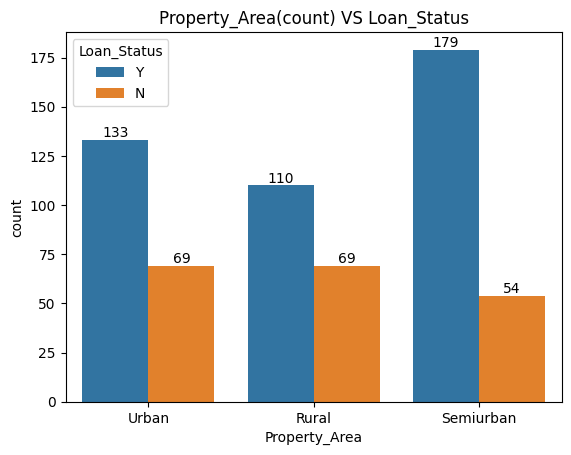

In [14]:
feature_info('Property_Area')

##### People from semiurban areas are the most likely to apply for a loan, and their chances of getting one are also higher than those from urban and rural areas. 

# Continuous / Numerical Feature

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Descriptive Statistical Info

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
df.groupby('Loan_Status').median() # median because Not affected with outliers

# we can see that when we got low median in CoapplicantInocme we got Loan_Status = N

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


In [18]:
df.select_dtypes(['int','float']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

## ApplicantIncome

In [19]:
df['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

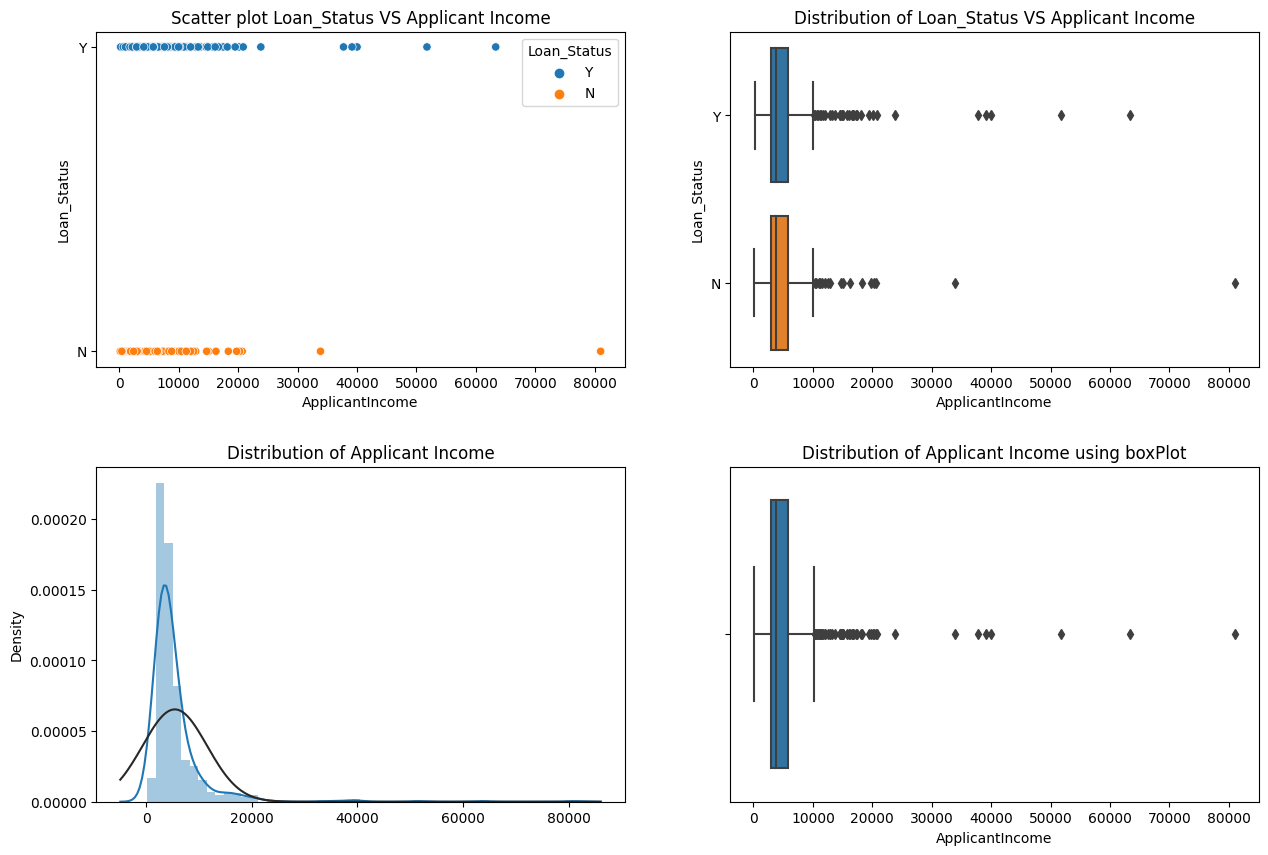

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x=df['ApplicantIncome'], y=df['Loan_Status'],hue=df['Loan_Status'],ax=axes[0][0])
axes[0][0].set_title(('Scatter plot Loan_Status VS Applicant Income'))
sns.boxplot(x=df['ApplicantIncome'],ax=axes[0][1],y=df['Loan_Status'])
axes[0][1].set_title(('Distribution of Loan_Status VS Applicant Income'))

sns.distplot(x=df['ApplicantIncome'],kde=True,ax=axes[1][0],fit=norm)
axes[1][0].set_title(('Distribution of Applicant Income'))
                    
sns.boxplot(x=df['ApplicantIncome'],ax=axes[1][1])
axes[1][1].set_title(('Distribution of Applicant Income using boxPlot'))                     
fig.subplots_adjust(wspace=0.2,hspace=0.3,)


##  CoapplicantIncome

In [21]:
df['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

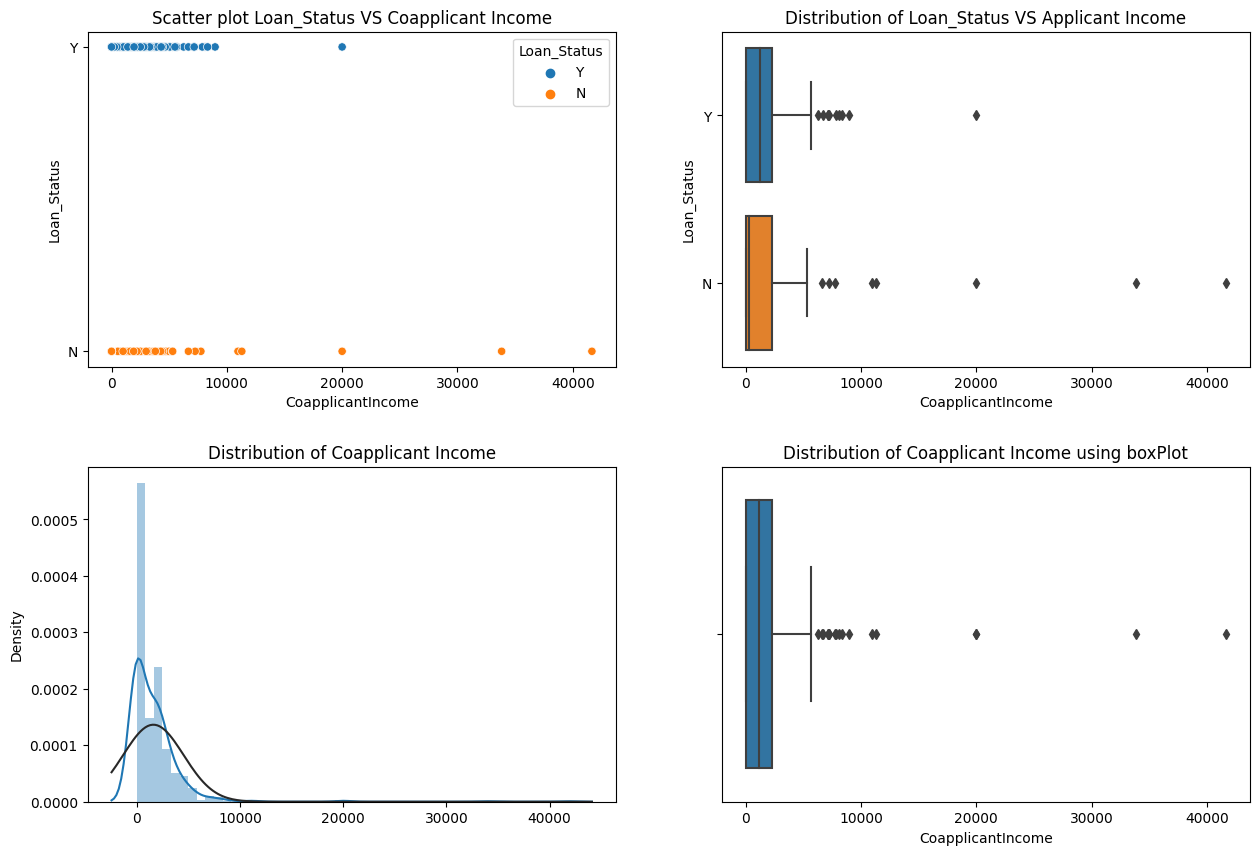

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x=df['CoapplicantIncome'], y=df['Loan_Status'],hue=df['Loan_Status'],ax=axes[0][0])
axes[0][0].set_title(('Scatter plot Loan_Status VS Coapplicant Income'))
sns.boxplot(x=df['CoapplicantIncome'],ax=axes[0][1],y=df['Loan_Status'])
axes[0][1].set_title(('Distribution of Loan_Status VS Applicant Income'))

sns.distplot(x=df['CoapplicantIncome'],kde=True,ax=axes[1][0],fit=norm)
axes[1][0].set_title(('Distribution of Coapplicant Income'))
                    
sns.boxplot(x=df['CoapplicantIncome'],ax=axes[1][1])
axes[1][1].set_title(('Distribution of Coapplicant Income using boxPlot'))                     
fig.subplots_adjust(wspace=0.2,hspace=0.3,)

# LoanAmount 


In [23]:
#df['LoanAmount'].agg(['mean','median', 'max','min',])
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [24]:
df['LoanAmount'].value_counts().head(10)

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
128.0    11
113.0    11
130.0    10
95.0      9
96.0      9
Name: LoanAmount, dtype: int64

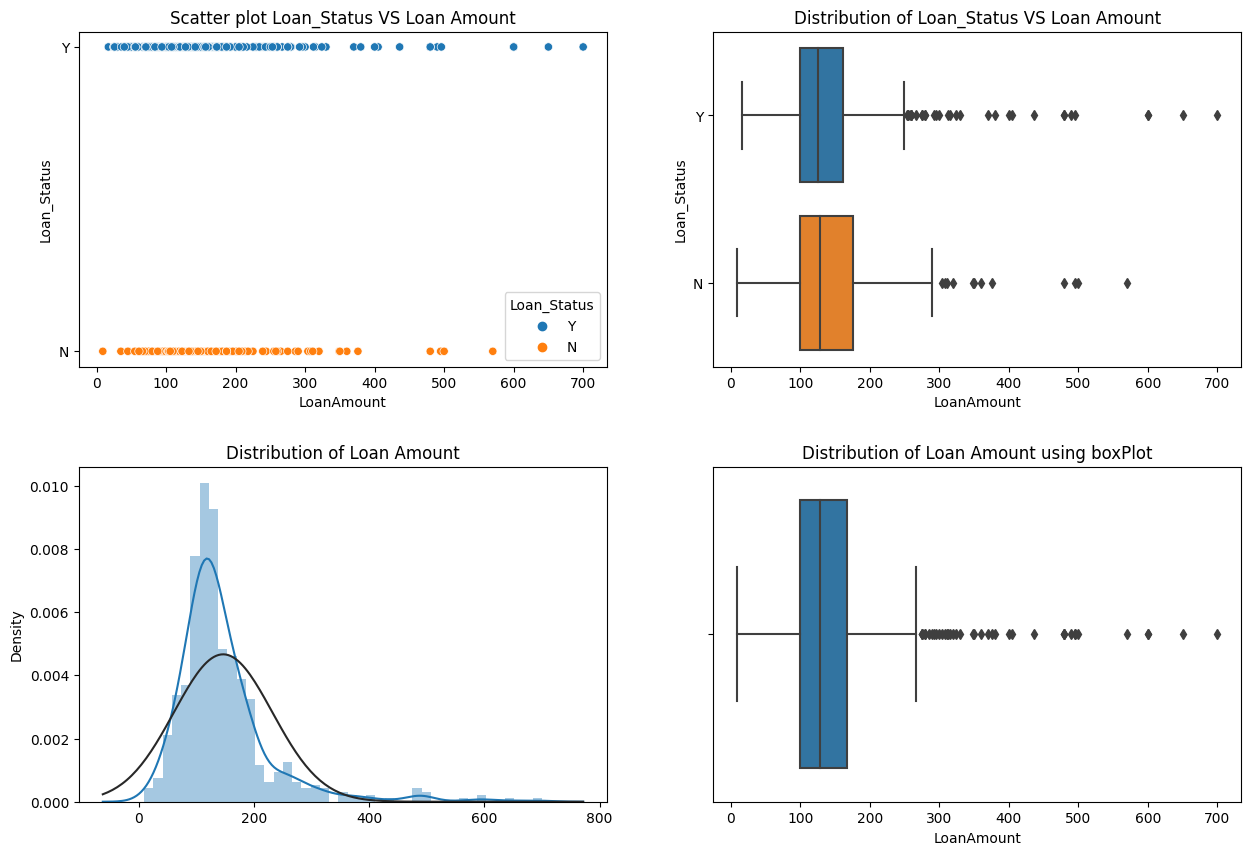

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x=df['LoanAmount'], y=df['Loan_Status'],hue=df['Loan_Status'],ax=axes[0][0])
axes[0][0].set_title(('Scatter plot Loan_Status VS Loan Amount'))
sns.boxplot(x=df['LoanAmount'],ax=axes[0][1],y=df['Loan_Status'])
axes[0][1].set_title(('Distribution of Loan_Status VS Loan Amount'))

sns.distplot(x=df['LoanAmount'],kde=True,ax=axes[1][0],fit=norm)
axes[1][0].set_title(('Distribution of Loan Amount'))
                    
sns.boxplot(x=df['LoanAmount'],ax=axes[1][1])
axes[1][1].set_title(('Distribution of Loan Amount using boxPlot'))                     
fig.subplots_adjust(wspace=0.2,hspace=0.3,)

# Loan_Amount_Term

Loan_amount_term shows within how much time you repay your loan.

In [26]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [27]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot: >

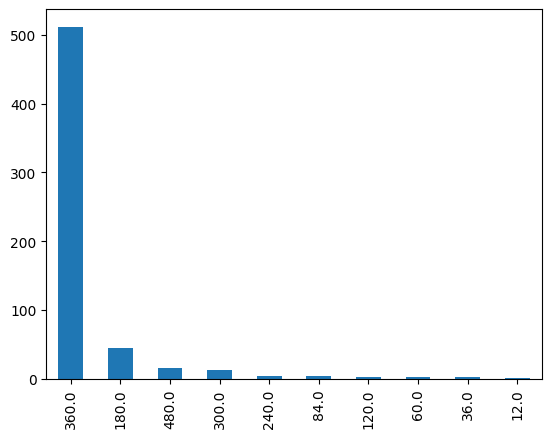

In [28]:
df['Loan_Amount_Term'].value_counts().plot(kind='bar')

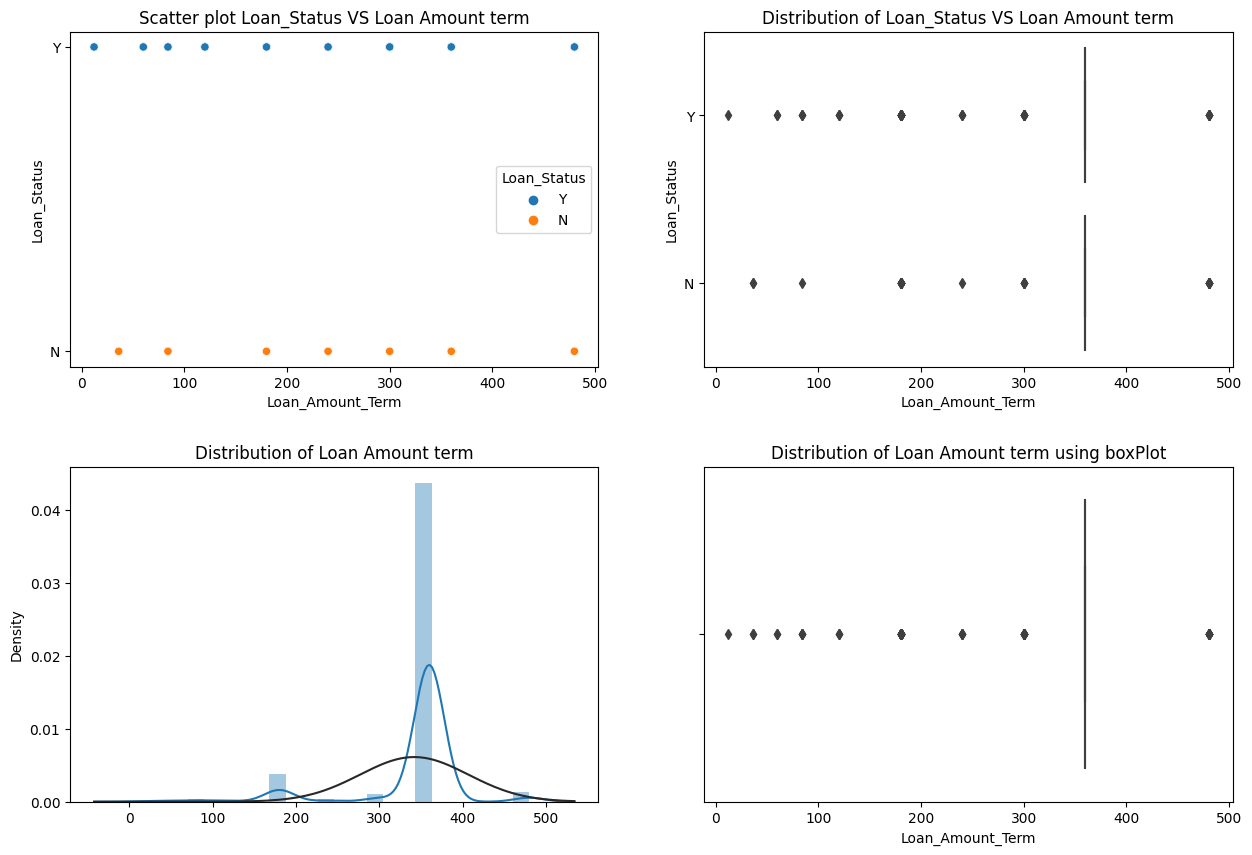

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x=df['Loan_Amount_Term'], y=df['Loan_Status'],hue=df['Loan_Status'],ax=axes[0][0])
axes[0][0].set_title(('Scatter plot Loan_Status VS Loan Amount term'))
sns.boxplot(x=df['Loan_Amount_Term'],ax=axes[0][1],y=df['Loan_Status'])
axes[0][1].set_title(('Distribution of Loan_Status VS Loan Amount term'))

sns.distplot(x=df['Loan_Amount_Term'],kde=True,ax=axes[1][0],fit=norm)
axes[1][0].set_title(('Distribution of Loan Amount term'))
                    
sns.boxplot(x=df['Loan_Amount_Term'],ax=axes[1][1])
axes[1][1].set_title(('Distribution of Loan Amount term using boxPlot'))                     
fig.subplots_adjust(wspace=0.2,hspace=0.3,)

In [30]:
df.groupby('Loan_Status')['Loan_Amount_Term'].value_counts(normalize=True)

Loan_Status  Loan_Amount_Term
N            360.0               0.822581
             180.0               0.080645
             480.0               0.048387
             300.0               0.026882
             36.0                0.010753
             84.0                0.005376
             240.0               0.005376
Y            360.0               0.867150
             180.0               0.070048
             300.0               0.019324
             480.0               0.014493
             84.0                0.007246
             120.0               0.007246
             240.0               0.007246
             60.0                0.004831
             12.0                0.002415
Name: Loan_Amount_Term, dtype: float64

<AxesSubplot: xlabel='Loan_Status,Loan_Amount_Term'>

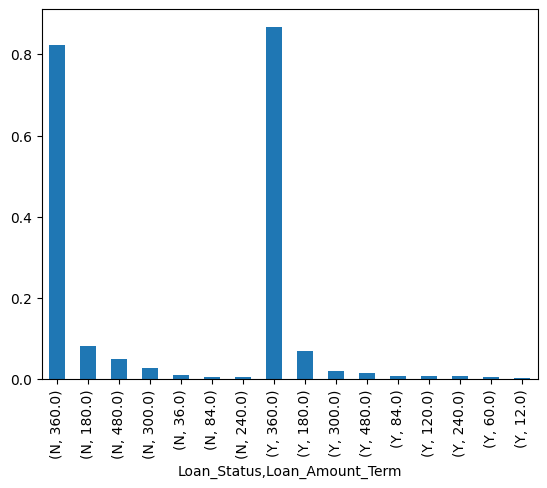

In [31]:
df.groupby('Loan_Status')['Loan_Amount_Term'].value_counts(normalize=True).plot(kind='bar')

In [32]:
#df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts(normalize=True).plot(kind='bar')
df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts(normalize=True)

Loan_Amount_Term  Loan_Status
12.0              Y              1.000000
36.0              N              1.000000
60.0              Y              1.000000
84.0              Y              0.750000
                  N              0.250000
120.0             Y              1.000000
180.0             Y              0.659091
                  N              0.340909
240.0             Y              0.750000
                  N              0.250000
300.0             Y              0.615385
                  N              0.384615
360.0             Y              0.701172
                  N              0.298828
480.0             N              0.600000
                  Y              0.400000
Name: Loan_Status, dtype: float64

#Based on the Loan Amount term customer applied for loan,there are 8 loan term customer can apply.

## Credit_History 

- 1.0 means person has a Credit History
- 0.0 Dont have any Credit History

In [33]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [34]:
df.groupby('Loan_Status')['Credit_History'].value_counts()

Loan_Status  Credit_History
N            1.0                97
             0.0                82
Y            1.0               378
             0.0                 7
Name: Credit_History, dtype: int64

In [35]:
df.groupby('Credit_History')['Loan_Status'].value_counts()#.plot(kind='bar')

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

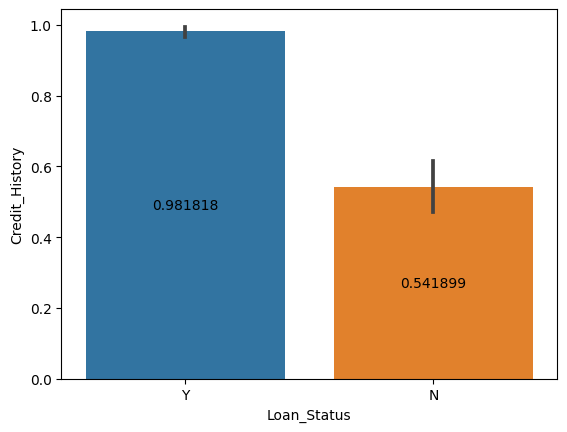

In [36]:
ax=sns.barplot(x=df['Loan_Status'],y=df['Credit_History'],estimator='mean')
for container in ax.containers:
        ax.bar_label(container,label_type='center')

-  This shows that if the person has a credit history, there is a 98% possibility of getting loan approval.
- Important Feature for Target value Predicton

# Checking for Nan/ Missing Value/ Duplicate Value

In [37]:
df.duplicated().sum() #non duplicate value

0

In [38]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

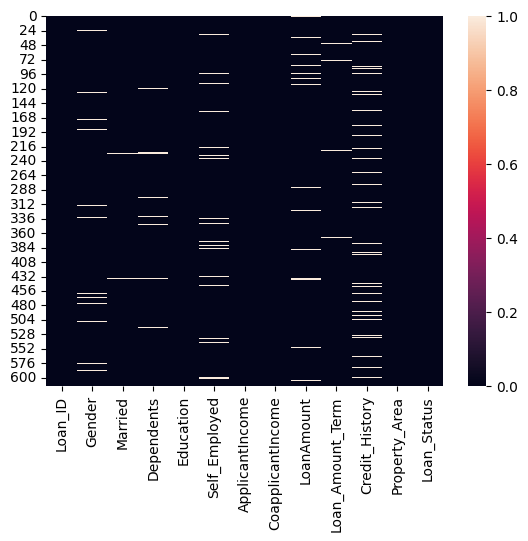

In [39]:
sns.heatmap(df.isnull())

## Filling Nan values

In [40]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [41]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

<AxesSubplot: >

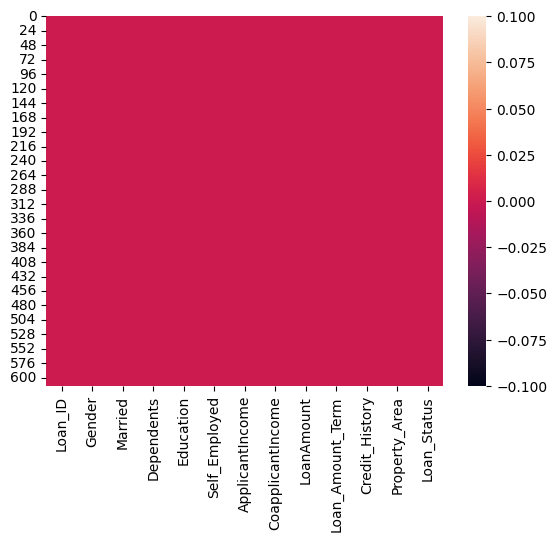

In [42]:
sns.heatmap(df.isnull())

- This full-red heatmap shows there are no missing values.

## Feature Selection

- Column Loan_Id  dont have any significant imporatance so, We are dropping this column

In [43]:
df.drop('Loan_ID',axis=1,inplace=True)

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
X=df.drop('Loan_Status',axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [46]:
y=df['Loan_Status'].map({'N':0,'Y':1})
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## Encoding Categorical Column

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models. In the field of data science, before going for the modelling, data preparation is a mandatory task.

In [47]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
oe=OrdinalEncoder()

In [48]:
X[['Gender','Married','Dependents','Education','Self_Employed',"Property_Area"]]=oe.fit_transform(X[['Gender','Married','Dependents','Education','Self_Employed',"Property_Area"]])

In [49]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0


## Train test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [52]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [53]:
y_test.value_counts()

1    85
0    38
Name: Loan_Status, dtype: int64

## function is Created to check different Model

In [54]:
def mymodel(model):
    model.fit(X_train,y_train)
    ypred= model.predict(X_test)
    
    train_Score=model.score(X_train,y_train)
    test_Score=model.score(X_test,y_test)
    ra = roc_auc_score(y_test,ypred)
    #ypredprob= model.predict_proba(X_test)[:,-1]
    #fpr , tpr , thres = roc_curve(y_test,ypredprob)
    print(f"train:-{train_Score}\ntest:- {test_Score}")
    print()
    print(f"Accuracy_Score:-{accuracy_score(ypred,y_test)}")
    #print(f"Precison Score:-{precision_score(ypred,y_test)}")
    print(f"AUC:-{ra}")
    
    #plt.plot(fpr,tpr)
    
    print("CLASSIFICATION_REPORT\n",classification_report(ypred,y_test))
    print(plot_confusion_matrix(model,X_test,y_test))
    print()
    return model

# Importing Classfcation Algorithm

In [55]:
#Logistice Regression Algorithm
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
logreg=LogisticRegression()
logregCV=LogisticRegressionCV(cv=10)

#K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#Support Vector
from sklearn.svm import SVC
svc=SVC()

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
bnb=BernoulliNB()
gnb=GaussianNB()
mnb=MultinomialNB()

#Boosting Algorithm
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
ada=AdaBoostClassifier(base_estimator=logreg)
gba=GradientBoostingClassifier()
import xgboost as xgb

# Importing Evaluation Metrics

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import roc_curve,precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import accuracy_score, make_scorer

## Baseline Model

# LogisticeRegression

train:-0.8004073319755601
test:- 0.8536585365853658

Accuracy_Score:-0.8536585365853658
AUC:-0.7704334365325077
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.55      0.95      0.70        22
           1       0.99      0.83      0.90       101

    accuracy                           0.85       123
   macro avg       0.77      0.89      0.80       123
weighted avg       0.91      0.85      0.87       123




LogisticRegression()

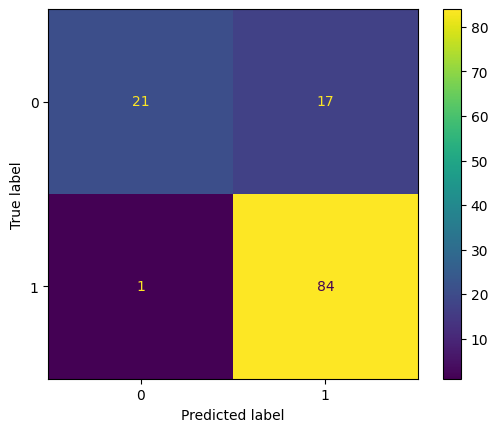

In [57]:
mymodel(logreg)

In [58]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logreg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.80 %
Standard Deviation: 4.42 %


# GridSearchCV LogisticeRegression 

In [59]:
from sklearn.model_selection import GridSearchCV
log=LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'max_iter': [100, 500, 1000],
              'class_weight': [None, 'balanced']}
scorer = make_scorer(accuracy_score)
grid=GridSearchCV(estimator=log,param_grid=param_grid,cv=5,scoring=scorer,n_jobs=-1)

train:-0.6863543788187373
test:- 0.6910569105691057

Accuracy_Score:-0.6910569105691057
AUC:-0.5
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.69      0.82       123

    accuracy                           0.69       123
   macro avg       0.50      0.35      0.41       123
weighted avg       1.00      0.69      0.82       123




GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring=make_scorer(accuracy_score))

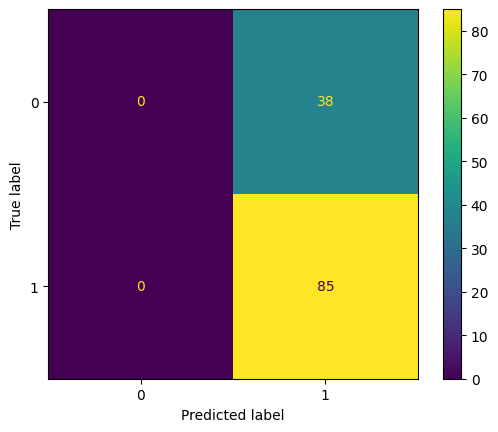

In [60]:
mymodel(grid)

In [61]:
grid.best_params_

{'C': 0.001,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

- able to classify only yes category

# LogisticRegressionCV

train:-0.7983706720977597
test:- 0.8617886178861789

Accuracy_Score:-0.8617886178861789
AUC:-0.7835913312693499
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.58      0.96      0.72        23
           1       0.99      0.84      0.91       100

    accuracy                           0.86       123
   macro avg       0.78      0.90      0.81       123
weighted avg       0.91      0.86      0.87       123




LogisticRegressionCV(cv=10)

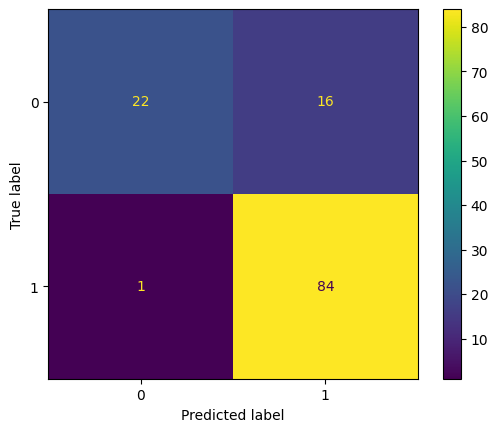

In [62]:
mymodel(logregCV)

- LogsticeCV Perofrm good with 86% accuracy

### Applying all other algorithm of Classification

# KNeighborsClassifier

train:-0.714867617107943
test:- 0.6504065040650406

Accuracy_Score:-0.6504065040650406
AUC:-0.5506191950464396
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.29      0.41      0.34        27
           1       0.81      0.72      0.76        96

    accuracy                           0.65       123
   macro avg       0.55      0.56      0.55       123
weighted avg       0.70      0.65      0.67       123




KNeighborsClassifier()

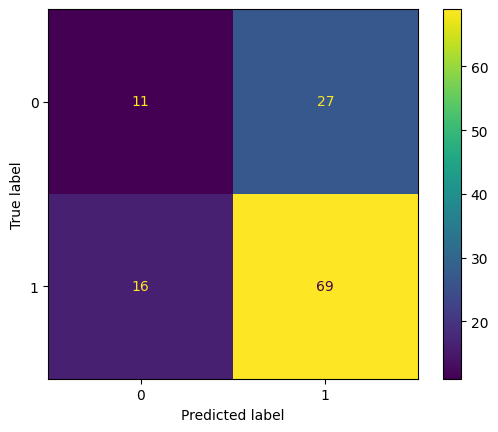

In [63]:
mymodel(knn)

- knn :- Accuracy 65% + Overfitting

# GridSearchCV KNN

In [64]:
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')

train:-0.6945010183299389
test:- 0.6747967479674797

Accuracy_Score:-0.6747967479674797
AUC:-0.5464396284829721
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.21      0.44      0.29        18
           1       0.88      0.71      0.79       105

    accuracy                           0.67       123
   macro avg       0.55      0.58      0.54       123
weighted avg       0.78      0.67      0.72       123




GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

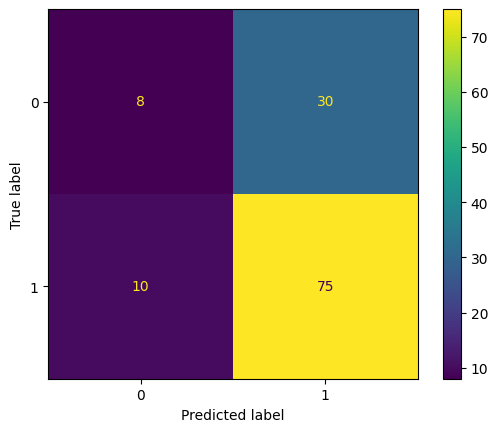

In [65]:
mymodel(grid_search)

In [66]:
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

- Knn with gridsearch- accuracy is increase by 2% i.e  67% 

# Support Vector

train:-0.6904276985743381
test:- 0.6910569105691057

Accuracy_Score:-0.6910569105691057
AUC:-0.5
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.69      0.82       123

    accuracy                           0.69       123
   macro avg       0.50      0.35      0.41       123
weighted avg       1.00      0.69      0.82       123




SVC()

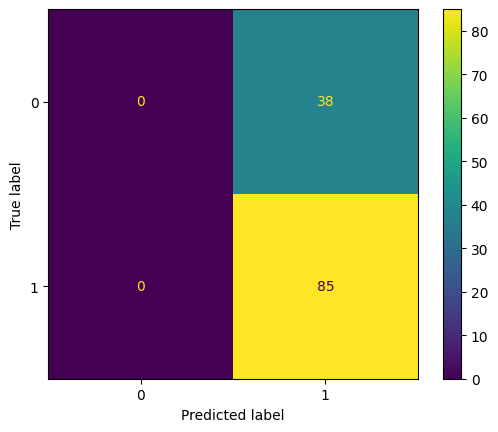

In [67]:
mymodel(svc)

- Support vector able to categories only one category

# DecisionTreeClassifier

train:-1.0
test:- 0.7560975609756098

Accuracy_Score:-0.7560975609756098
AUC:-0.7143962848297213
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.61      0.61      0.61        38
           1       0.82      0.82      0.82        85

    accuracy                           0.76       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.76      0.76      0.76       123




DecisionTreeClassifier()

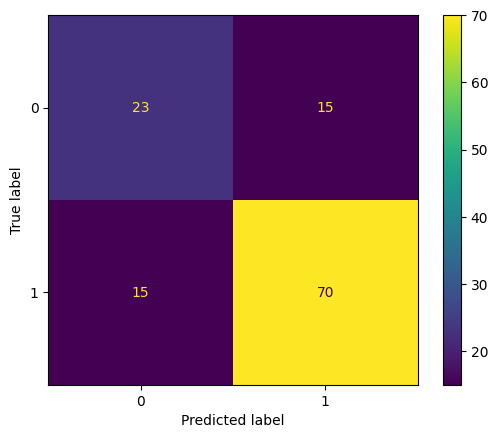

In [68]:
mymodel(dtc)

- DecisionTreeClassifier>> accuracy-75%

# GridSearchCV Decision tree 

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
dtc=DecisionTreeClassifier()

param_grid = {'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'criterion': ['gini', 'entropy']}
scorer = make_scorer(accuracy_score)

In [71]:
grid=GridSearchCV(dtc,param_grid,scoring=scorer,n_jobs=-1,cv=5)

train:-0.8187372708757638
test:- 0.8292682926829268

Accuracy_Score:-0.8292682926829268
AUC:-0.7455108359133128
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.53      0.87      0.66        23
           1       0.96      0.82      0.89       100

    accuracy                           0.83       123
   macro avg       0.75      0.84      0.77       123
weighted avg       0.88      0.83      0.84       123




GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(accuracy_score))

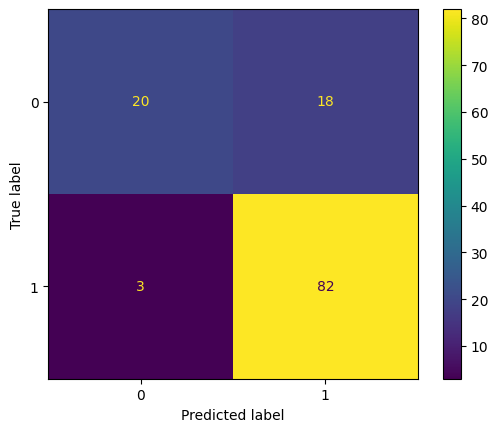

In [72]:
mymodel(grid)

In [73]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

- GridSearchCV Decision tree ->> Accuracy- 83% + No overfitiing/ underfirtting

# RandomForestClassifier

train:-1.0
test:- 0.8292682926829268

Accuracy_Score:-0.8292682926829268
AUC:-0.7673374613003097
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.61      0.79      0.69        29
           1       0.93      0.84      0.88        94

    accuracy                           0.83       123
   macro avg       0.77      0.82      0.78       123
weighted avg       0.85      0.83      0.84       123




RandomForestClassifier()

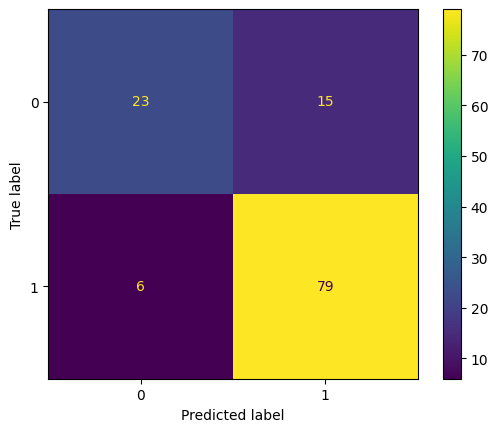

In [74]:
mymodel(rfc)

- RandomForest->> Accuracy-81% + Overfitted Model

# GridSearchCV Random Forest

In [75]:
rfc=RandomForestClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': ['sqrt', 0.5]}

In [76]:
grid=GridSearchCV(rfc,param_grid,scoring=scorer,cv=5,n_jobs=-1)

train:-0.814663951120163
test:- 0.8455284552845529

Accuracy_Score:-0.8455284552845529
AUC:-0.7572755417956657
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.53      0.95      0.68        21
           1       0.99      0.82      0.90       102

    accuracy                           0.85       123
   macro avg       0.76      0.89      0.79       123
weighted avg       0.91      0.85      0.86       123




GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(accuracy_score))

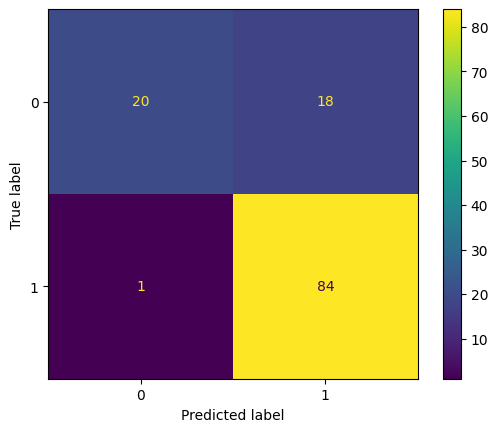

In [77]:
mymodel(grid)

In [78]:
grid.best_params_

{'max_depth': 5,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

- GridSearchCV Random Forest--> Accuracy=85%

# BernoulliNB

train:-0.7983706720977597
test:- 0.8536585365853658

Accuracy_Score:-0.8536585365853658
AUC:-0.7704334365325077
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.55      0.95      0.70        22
           1       0.99      0.83      0.90       101

    accuracy                           0.85       123
   macro avg       0.77      0.89      0.80       123
weighted avg       0.91      0.85      0.87       123




BernoulliNB()

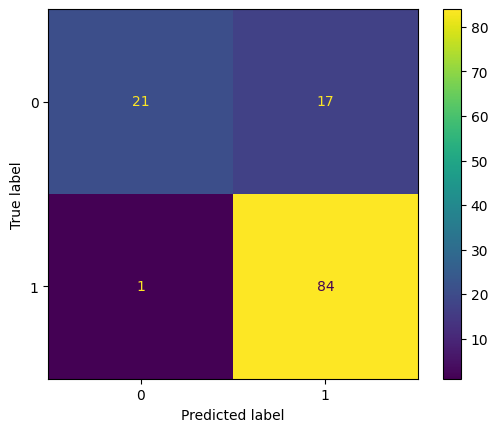

In [79]:
mymodel(bnb)

- BernouliNB--> Accuracy-85% +

# GridSearchCV  BernoulliNB

In [80]:
bnb = BernoulliNB()

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0],
              'binarize': np.arange(0,1.1,0.1) }

# Define the evaluation metric
scorer = make_scorer(accuracy_score)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=-1)


train:-0.7983706720977597
test:- 0.8536585365853658

Accuracy_Score:-0.8536585365853658
AUC:-0.7704334365325077
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.55      0.95      0.70        22
           1       0.99      0.83      0.90       101

    accuracy                           0.85       123
   macro avg       0.77      0.89      0.80       123
weighted avg       0.91      0.85      0.87       123




GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0],
                         'binarize': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring=make_scorer(accuracy_score))

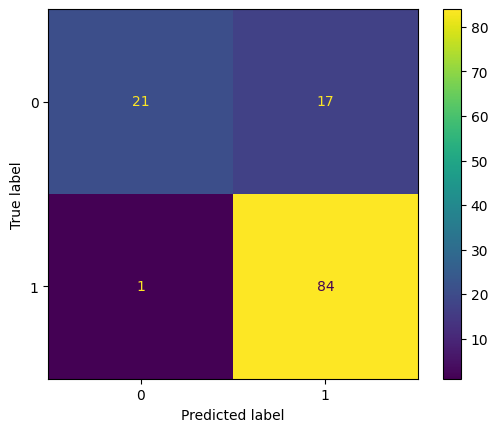

In [81]:
mymodel(grid_search)

In [82]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'alpha': 0.1, 'binarize': 0.0}


- Accuracy- 85%

# GaussianNB

train:-0.7922606924643585
test:- 0.8455284552845529

Accuracy_Score:-0.8455284552845529
AUC:-0.771826625386997
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.58      0.88      0.70        25
           1       0.96      0.84      0.90        98

    accuracy                           0.85       123
   macro avg       0.77      0.86      0.80       123
weighted avg       0.89      0.85      0.86       123




GaussianNB()

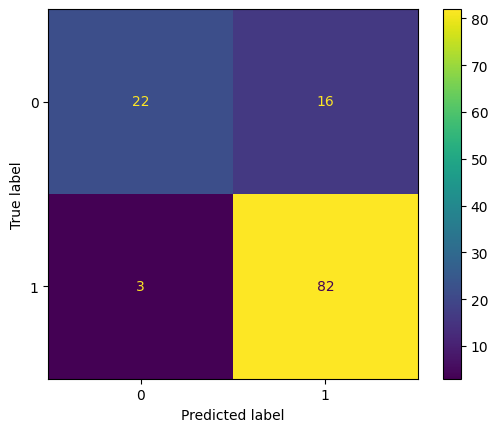

In [83]:
mymodel(gnb)

- GaussianNB ->> Accuracy-85%

# GridSearchCV GaussianNB

In [84]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7]}
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')

train:-0.7922606924643585
test:- 0.8455284552845529

Accuracy_Score:-0.8455284552845529
AUC:-0.771826625386997
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.58      0.88      0.70        25
           1       0.96      0.84      0.90        98

    accuracy                           0.85       123
   macro avg       0.77      0.86      0.80       123
weighted avg       0.89      0.85      0.86       123




GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-11, 1e-10, 1e-09, 1e-08, 1e-07]},
             scoring='accuracy')

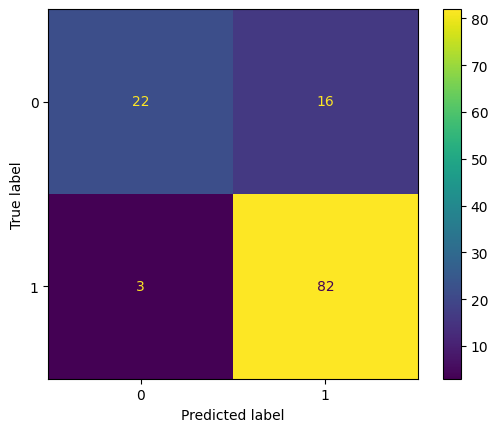

In [85]:
mymodel(grid_search)

In [86]:
grid_search.best_params_

{'var_smoothing': 1e-09}

- GridsearchCV GaussianNB ->> Accuracy-85%

# MultinomialNB

train:-0.48676171079429736
test:- 0.4959349593495935

Accuracy_Score:-0.4959349593495935
AUC:-0.5043343653250775
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.53      0.31      0.39        64
           1       0.48      0.69      0.57        59

    accuracy                           0.50       123
   macro avg       0.50      0.50      0.48       123
weighted avg       0.51      0.50      0.48       123




MultinomialNB()

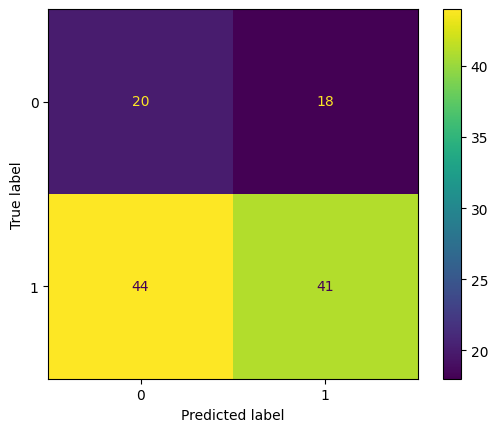

In [87]:
mymodel(mnb)

- Not perform well

In [88]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0


# ###Removing Outlier and Checking Skewness

An outlier is a piece of data that is an abnormal distance from other points. In other words, it’s data that lies outside the other values in the set. If you had Pinocchio in a class of children, the length of his nose compared to the other children would be an outlier.
In this set of random numbers, 1 and 201 are outliers:
1, 99, 100, 101, 103, 109, 110, 201
“1” is an extremely low value and “201” is an extremely high value.

Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve.

In [89]:
df2=df.copy()

In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [91]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [92]:
df2.groupby('Loan_Status').median() # median because Not affected with outlier

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,128.0,360.0,1.0
Y,3812.5,1239.5,128.0,360.0,1.0


In [93]:
df2.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,149.890625,344.56250,0.572917
Y,5384.068720,1504.516398,143.869668,341.43128,0.983412


# ApplicantIncome

<AxesSubplot: xlabel='Loan_Status', ylabel='ApplicantIncome'>

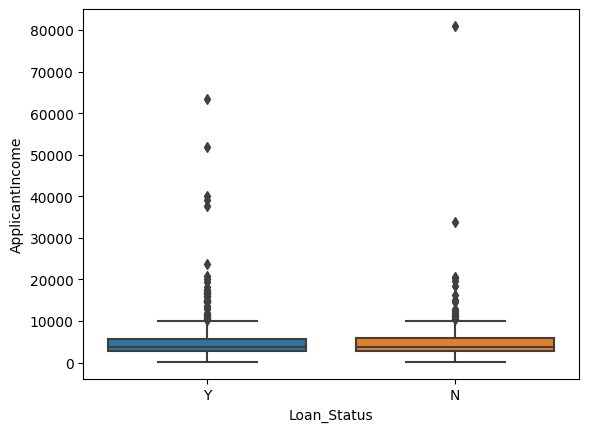

In [94]:
sns.boxplot(y=df2['ApplicantIncome'],x=df2['Loan_Status'])

In [95]:
aidex=df2[df2['ApplicantIncome']>30000].index

In [96]:
df2.drop(aidex,axis=0,inplace=True)

<AxesSubplot: xlabel='Loan_Status', ylabel='ApplicantIncome'>

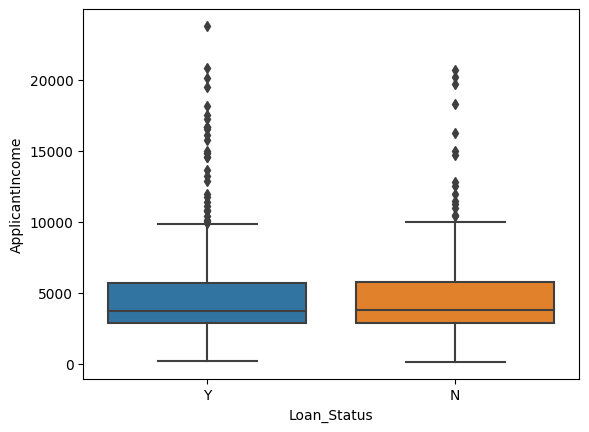

In [97]:
sns.boxplot(y=df2['ApplicantIncome'],x=df2['Loan_Status'])

<AxesSubplot: ylabel='Density'>

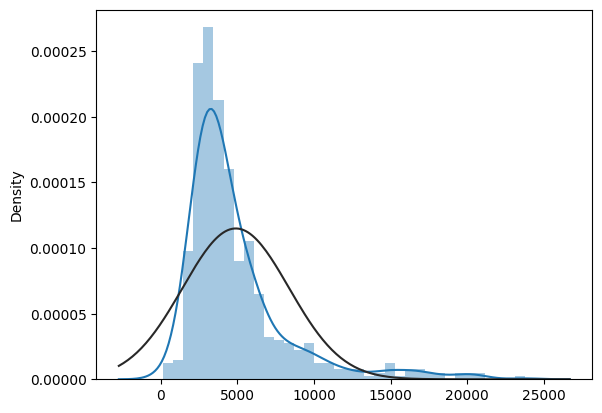

In [98]:
sns.distplot(x=df2['ApplicantIncome'],kde=True,fit=norm)

In [99]:
skew(df2['ApplicantIncome'])

2.346581509483919

In [100]:
skew(np.log(df2['ApplicantIncome']))

-0.06002818156085242

<AxesSubplot: xlabel='ApplicantIncome', ylabel='Density'>

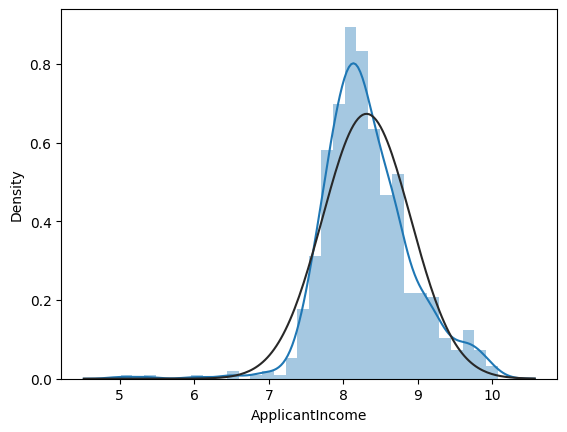

In [101]:
sns.distplot(np.log(df2['ApplicantIncome']),kde=True,fit=norm)

# Coapplicant

In [102]:
df2['CoapplicantIncome'].describe() #

count      607.000000
mean      1632.116837
std       2935.906180
min          0.000000
25%          0.000000
50%       1229.000000
75%       2304.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

#Mean greater than median i.e Positive and Right Skew

In [103]:
skew(df2['CoapplicantIncome'])

7.473806583724485

<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Loan_Status'>

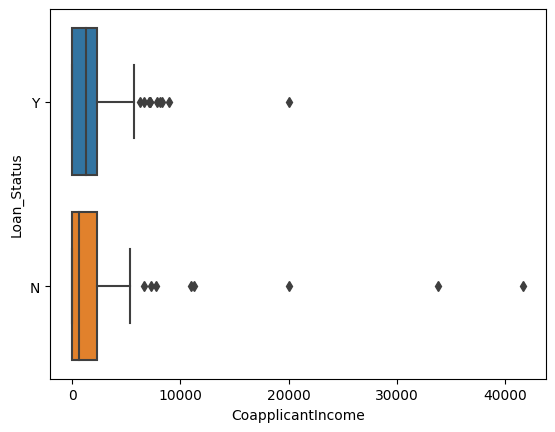

In [104]:
sns.boxplot(x=df2['CoapplicantIncome'],y=df2['Loan_Status'])


<AxesSubplot: ylabel='Density'>

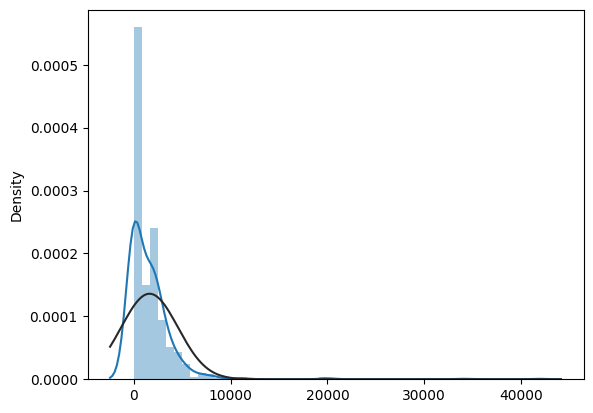

In [105]:
sns.distplot(x=df2['CoapplicantIncome'],kde=True,fit=norm)

In [106]:
cidex=df2[df2['CoapplicantIncome']>10000].index

In [107]:
df2.drop(cidex,axis=0,inplace=True)

<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Loan_Status'>

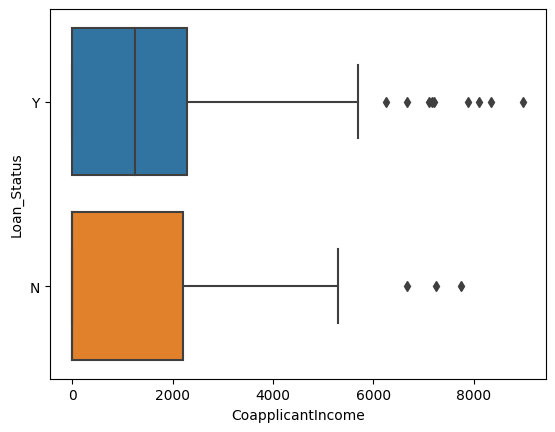

In [108]:
sns.boxplot(x=df2['CoapplicantIncome'],y=df2['Loan_Status'])

<AxesSubplot: ylabel='Density'>

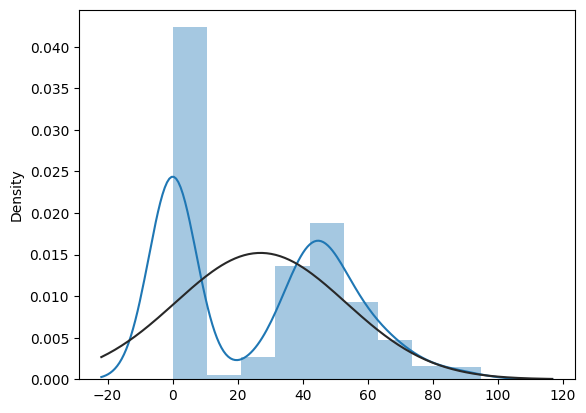

In [109]:
sns.distplot(x=np.sqrt(df2['CoapplicantIncome']),kde=True,fit=norm)

In [110]:
skew(np.sqrt(df2['CoapplicantIncome']))

0.24840763266854976

# Loan_Amount

In [111]:
df2['LoanAmount'].describe()

count    601.000000
mean     141.737105
std       75.458183
min        9.000000
25%      100.000000
50%      128.000000
75%      161.000000
max      650.000000
Name: LoanAmount, dtype: float64

In [112]:
#mean greater than median i.e right skeww

In [113]:
skew(df2['LoanAmount'])

2.5709238551670714

<AxesSubplot: xlabel='LoanAmount', ylabel='Loan_Status'>

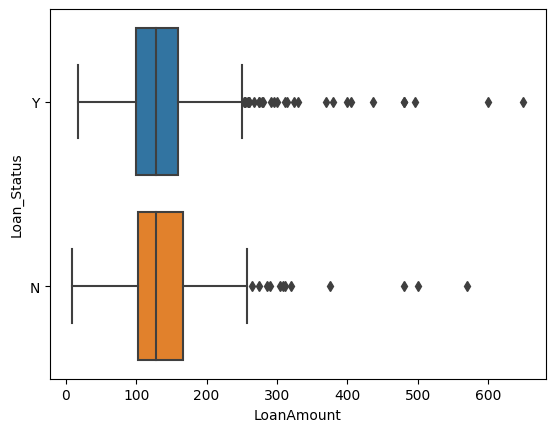

In [114]:
sns.boxplot(x=df2['LoanAmount'],y=df2['Loan_Status'])

<AxesSubplot: ylabel='Density'>

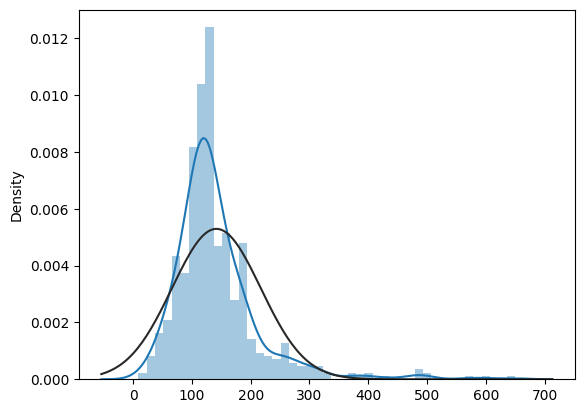

In [115]:
sns.distplot(x=df2['LoanAmount'],fit=norm)

In [116]:
lidex=df2[df2['LoanAmount']>300].index

In [117]:
df2.drop(lidex,axis=0,inplace=True)

<AxesSubplot: xlabel='LoanAmount', ylabel='Loan_Status'>

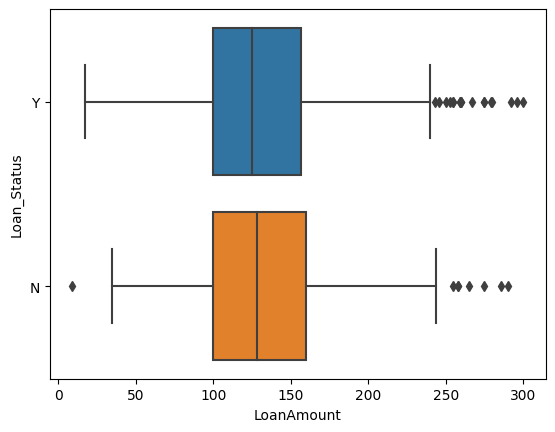

In [118]:
sns.boxplot(x=df2['LoanAmount'],y=df2['Loan_Status'])

<AxesSubplot: xlabel='LoanAmount', ylabel='Density'>

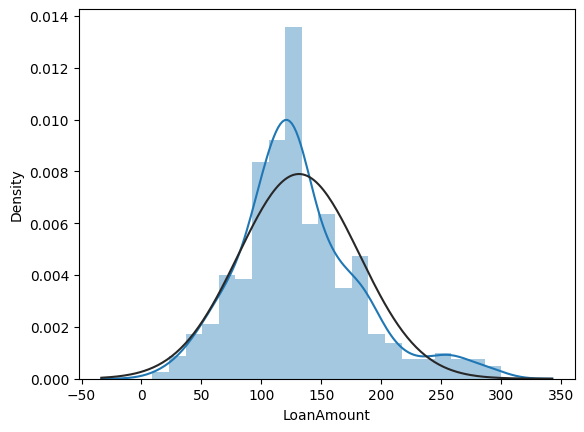

In [119]:
sns.distplot(df2['LoanAmount'],fit=norm)

In [120]:
skew(df2['LoanAmount'])

0.7359763961941276

In [121]:
#sns.distplot(np.log(df2.drop(lidex,axis=0)['LoanAmount']),fit=norm)

In [122]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,579.000000,579.000000,579.000000,579.000000,579.000000
mean,4576.955095,1371.768428,131.324698,342.279793,0.853195
std,2891.243060,1612.158727,50.538638,64.892121,0.354217
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2816.000000,0.000000,100.000000,360.000000,1.000000
50%,3716.000000,1131.000000,127.000000,360.000000,1.000000
75%,5404.000000,2216.500000,158.000000,360.000000,1.000000
max,20667.000000,8980.000000,300.000000,480.000000,1.000000


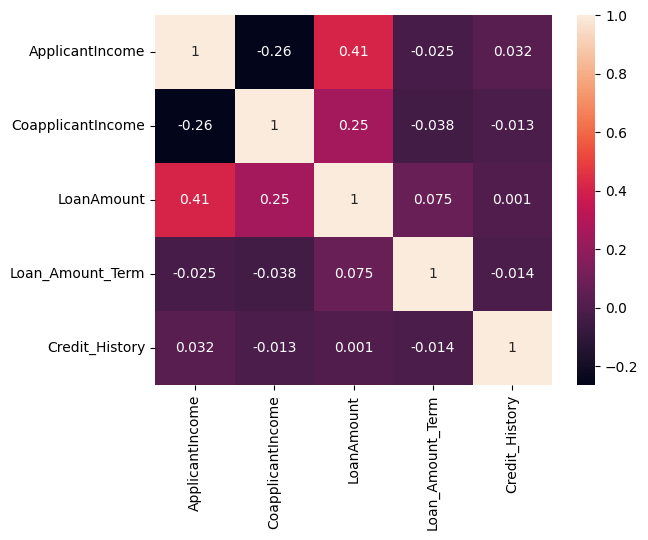

In [123]:
sns.heatmap(df2.corr(),annot=True);

In [124]:
df2.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,4519.107345,1240.593220,132.581921,344.271186,0.553672
Y,4602.425373,1429.524677,130.771144,341.402985,0.985075


In [125]:
df2.groupby('Loan_Status').median() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3708.0,0.0,128.0,360.0,1.0
Y,3716.5,1280.0,125.0,360.0,1.0


In [126]:
# Skewness Removal
df2['CoapplicantIncome']=np.sqrt(df2['CoapplicantIncome'])

In [127]:
df2['Loan_Amount_Term'] = df2['Loan_Amount_Term'].astype('O')

In [128]:
X2=df2.drop('Loan_Status',axis=1)
X2.shape

(579, 11)

In [129]:
y2=df2['Loan_Status'].map({'N':0,'Y':1})
y2.shape

(579,)

In [130]:
y2.value_counts()

1    402
0    177
Name: Loan_Status, dtype: int64

In [131]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
oe=OrdinalEncoder()

X2[['Gender','Married','Dependents','Education','Self_Employed',"Property_Area",'Loan_Amount_Term']]=oe.fit_transform(X2[['Gender','Married','Dependents','Education','Self_Employed',"Property_Area",'Loan_Amount_Term']])

In [132]:
oe.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Rural', 'Semiurban', 'Urban'], dtype=object),
 array([12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0, 480.0],
       dtype=object)]

In [133]:
X.corrwith(y)

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Property_Area        0.032112
dtype: float64

In [134]:
X2.corrwith(y2)

Gender               0.025689
Married              0.085975
Dependents           0.021767
Education           -0.098100
Self_Employed       -0.015475
ApplicantIncome      0.013288
CoapplicantIncome    0.075453
LoanAmount          -0.016521
Loan_Amount_Term    -0.001023
Credit_History       0.561577
Property_Area        0.014490
dtype: float64

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42,stratify=y2)

## Feature Scaling data

Feature scaling is a data preprocessing technique that involves transforming the values of features or variables in a dataset to a similar scale. This is done to ensure that all features contribute equally to the model and to prevent features with larger values from dominating the model. Feature scaling is essential when working with datasets where the features have different ranges, units of measurement, or orders of magnitude. Common feature scaling techniques include standardization, normalization, and min-max scaling.

In [136]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [137]:
X_train

array([[ 0.48102285, -1.37613589, -0.73998141, ...,  0.30204227,
         0.38215128, -1.39565085],
       [ 0.48102285,  0.72667242,  0.24737131, ...,  0.30204227,
         0.38215128, -0.11098615],
       [ 0.48102285,  0.72667242,  1.23472403, ..., -2.28769054,
         0.38215128, -0.11098615],
       ...,
       [ 0.48102285, -1.37613589, -0.73998141, ...,  0.30204227,
         0.38215128, -0.11098615],
       [ 0.48102285,  0.72667242,  2.22207674, ...,  0.30204227,
        -2.61676473, -0.11098615],
       [-2.07890334, -1.37613589,  0.24737131, ...,  0.30204227,
         0.38215128,  1.17367854]])

# LogisticRegression

train:-0.8077753779697624
test:- 0.8706896551724138

Accuracy_Score:-0.8706896551724138
AUC:-0.8100529100529099
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.96      0.87      0.91        90

    accuracy                           0.87       116
   macro avg       0.81      0.88      0.83       116
weighted avg       0.89      0.87      0.88       116




LogisticRegression()

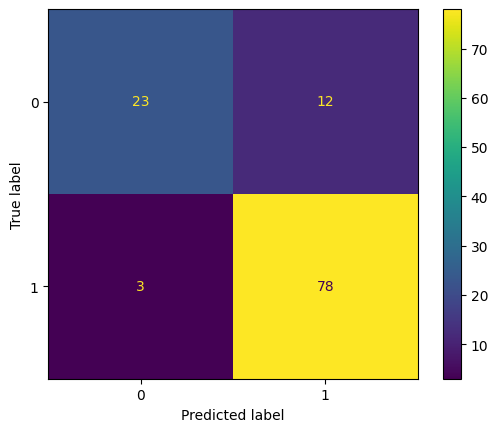

In [138]:
mymodel(logreg)

- Logreg-performing well with 87% accuracy

# LogisticRegressionCV

train:-0.8077753779697624
test:- 0.8706896551724138

Accuracy_Score:-0.8706896551724138
AUC:-0.8100529100529099
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.96      0.87      0.91        90

    accuracy                           0.87       116
   macro avg       0.81      0.88      0.83       116
weighted avg       0.89      0.87      0.88       116




LogisticRegressionCV(cv=10)

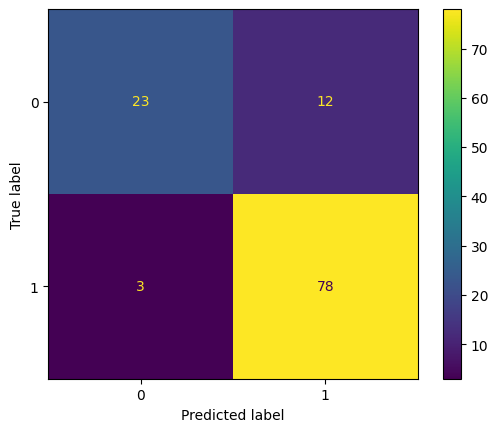

In [139]:
mymodel(logregCV)

# knn

train:-0.8185745140388769
test:- 0.8362068965517241

Accuracy_Score:-0.8362068965517241
AUC:-0.7934744268077603
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.69      0.75      0.72        32
           1       0.90      0.87      0.88        84

    accuracy                           0.84       116
   macro avg       0.79      0.81      0.80       116
weighted avg       0.84      0.84      0.84       116




KNeighborsClassifier()

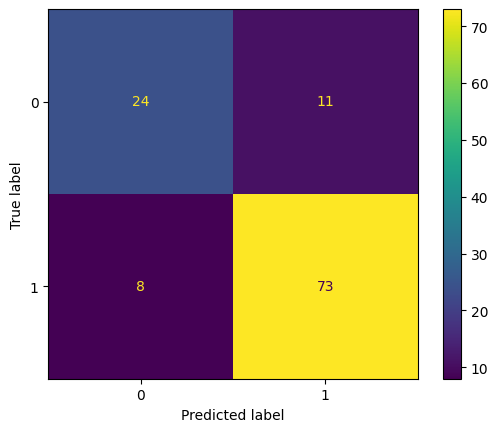

In [140]:
mymodel(knn)

# SVC

train:-0.8120950323974082
test:- 0.8706896551724138

Accuracy_Score:-0.8706896551724138
AUC:-0.8100529100529099
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.96      0.87      0.91        90

    accuracy                           0.87       116
   macro avg       0.81      0.88      0.83       116
weighted avg       0.89      0.87      0.88       116




SVC()

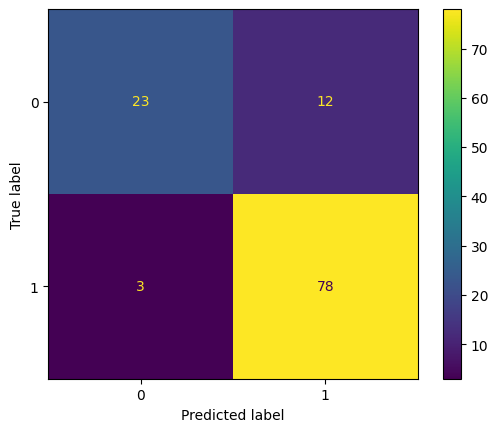

In [141]:
mymodel(svc)

# DecisionTreeClassifier

train:-1.0
test:- 0.7844827586206896

Accuracy_Score:-0.7844827586206896
AUC:-0.772663139329806
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.74      0.62      0.68        42
           1       0.80      0.88      0.84        74

    accuracy                           0.78       116
   macro avg       0.77      0.75      0.76       116
weighted avg       0.78      0.78      0.78       116




DecisionTreeClassifier()

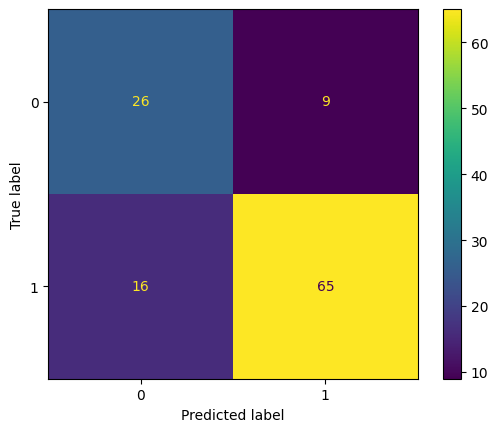

In [142]:
mymodel(dtc)

# RandomForestClassifier

train:-1.0
test:- 0.8103448275862069

Accuracy_Score:-0.8103448275862069
AUC:-0.7668430335097001
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.66      0.70      0.68        33
           1       0.88      0.86      0.87        83

    accuracy                           0.81       116
   macro avg       0.77      0.78      0.77       116
weighted avg       0.81      0.81      0.81       116




RandomForestClassifier()

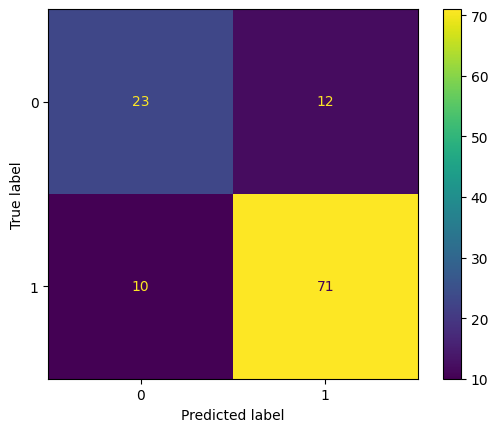

In [143]:
mymodel(rfc)

# BernoulliNB

train:-0.8077753779697624
test:- 0.8706896551724138

Accuracy_Score:-0.8706896551724138
AUC:-0.8100529100529099
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.96      0.87      0.91        90

    accuracy                           0.87       116
   macro avg       0.81      0.88      0.83       116
weighted avg       0.89      0.87      0.88       116




BernoulliNB()

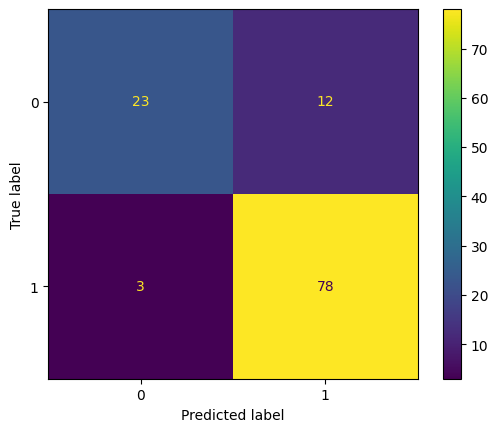

In [144]:
mymodel(bnb)

# GaussianNB

train:-0.8898488120950324
test:- 0.8620689655172413

Accuracy_Score:-0.8620689655172413
AUC:-0.8038800705467373
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.66      0.85      0.74        27
           1       0.95      0.87      0.91        89

    accuracy                           0.86       116
   macro avg       0.80      0.86      0.82       116
weighted avg       0.88      0.86      0.87       116




GradientBoostingClassifier()

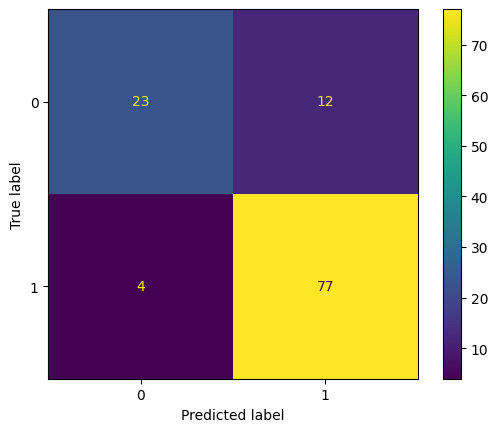

In [145]:
mymodel(gba)

# AdaBoostClassifier

train:-0.8077753779697624
test:- 0.8706896551724138

Accuracy_Score:-0.8706896551724138
AUC:-0.8100529100529099
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.96      0.87      0.91        90

    accuracy                           0.87       116
   macro avg       0.81      0.88      0.83       116
weighted avg       0.89      0.87      0.88       116




AdaBoostClassifier(base_estimator=LogisticRegression())

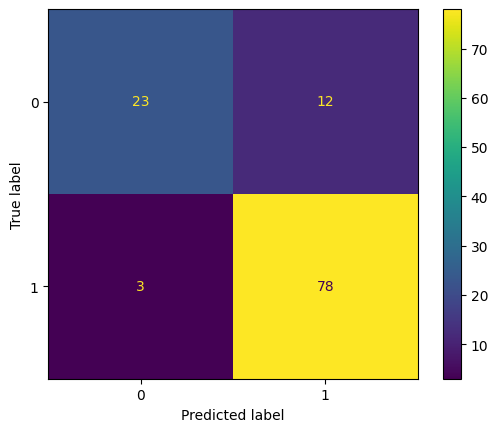

In [146]:
ada=AdaBoostClassifier(base_estimator=logreg)
mymodel(ada)

# GradientBoostingClassifier

train:-0.8898488120950324
test:- 0.8620689655172413

Accuracy_Score:-0.8620689655172413
AUC:-0.8038800705467373
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.66      0.85      0.74        27
           1       0.95      0.87      0.91        89

    accuracy                           0.86       116
   macro avg       0.80      0.86      0.82       116
weighted avg       0.88      0.86      0.87       116




GradientBoostingClassifier()

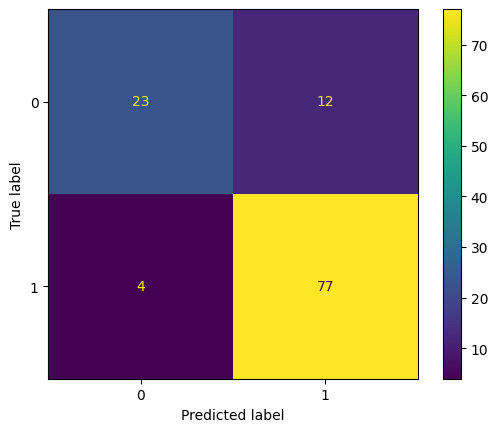

In [147]:
gbc=GradientBoostingClassifier()
mymodel(gbc)

# XGBClassifier

train:-0.9416846652267818
test:- 0.8275862068965517

Accuracy_Score:-0.8275862068965517
AUC:-0.7873015873015873
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        33
           1       0.89      0.87      0.88        83

    accuracy                           0.83       116
   macro avg       0.79      0.80      0.79       116
weighted avg       0.83      0.83      0.83       116




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

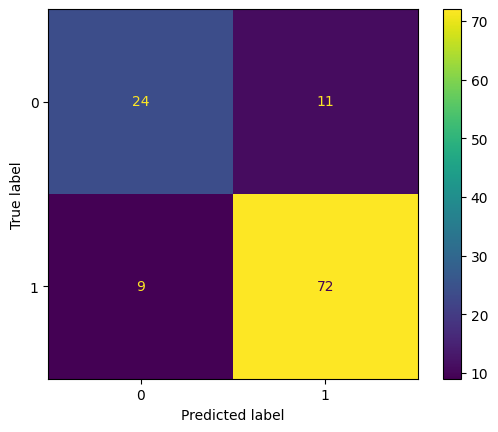

In [148]:
model= xgb.XGBClassifier(n_estimators=40,max_depth=4)
mymodel(model)

After Doing all Removing outlier feature Engineering, Found that Logistic regression,GaussianNb,GradientBoosting perform well after removing outlier and skewness

## Final Model

train:-0.8077753779697624
test:- 0.8706896551724138

Accuracy_Score:-0.8706896551724138
AUC:-0.8100529100529099
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.96      0.87      0.91        90

    accuracy                           0.87       116
   macro avg       0.81      0.88      0.83       116
weighted avg       0.89      0.87      0.88       116




LogisticRegressionCV(cv=10)

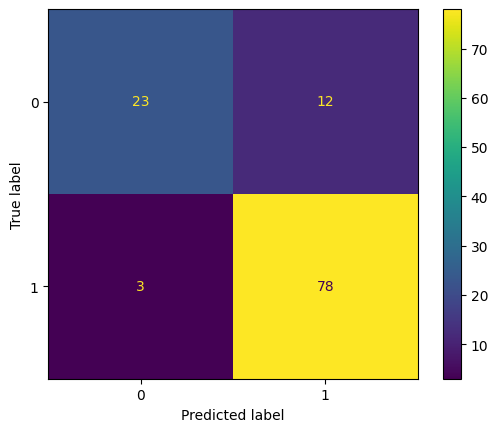

In [150]:
mymodel(logregCV)